### Primes

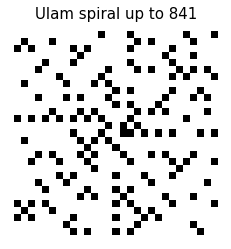

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Uses Sieve of Eratosthenes to generate a list of primes going up to a large upper limit
def get_primes(max_value):
    # Initialize a boolean array to mark numbers as prime or not
    is_prime = [True] * max_value
    
    # 0 and 1 are not prime, so mark them as False
    is_prime[0] = is_prime[1] = False
    
    # Iterate through numbers up to the square root of max_value
    for number in range(2, int(max_value**0.5) + 1):
        # If the current number is prime
        if is_prime[number]:
            # Mark all multiples of the current number as not prime
            for multiple in range(number * 2, max_value, number):
                is_prime[multiple] = False
                
    # Return a list of prime numbers
    return [number for number, prime in enumerate(is_prime) if prime]




# We colour the grid white if not prime and black if prime, by comparing to above
# We are generating a (2*(spirals-1)+1)) x (2*(spirals-1)+1)) grid with 'spiral' number of revolutions of the spiral
def generateSpiral(spirals):

    total_cells = (2*(spirals-1)+1)**2
    size = 2*spirals+1

    primes = get_primes(total_cells)

    P = np.zeros((size,size)) # Positions used
    U = np.zeros((size,size)) # Ulam spiral


    x = spirals+1
    y = spirals
    P[y,x] = 1
    U[y,x] = 2

    # The first move, hence set to 1
    P[y,x-1] = 1
    # Since 1 is not prime we set the grid to 0
    U[y,x-1] = 0

    #stepping through the square spiral
    for i in range(3, total_cells):
        # Determine the next position based on surrounding taken positions
        # If moving up keeps us in grid boundary
        # If the position above is not taken 
        # If the position to the left is taken
        # Then move up
        if (y + 1 < size) and (P[y + 1, x] == 0) and (P[y, x - 1] == 1):
            y += 1
            # Mark the current position as taken/checked
            P[y, x] = 1
            # update the Ulam spiral with prime numbers
            U[y,x] = (i in primes)*i
        # moving left
        elif (x - 1 < size) and (P[y, x - 1] == 0) and (P[y - 1, x] == 1):
            x -= 1
            P[y, x] = 1
            U[y,x] = (i in primes)*i
           # moving down
        elif (y - 1 >= 0) and (P[y - 1, x] == 0) and (P[y, x + 1] == 1):
            y -= 1
            P[y, x] = 1
            U[y,x] = (i in primes)*i
            #moving right 
        else:
            x += 1
            P[y, x] = 1
            U[y,x] = (i in primes)*i
        
    
    
    return U


lim= 15
P = (generateSpiral(lim) > 0).astype(int)
P_flipped = np.flipud(P)

plt.title('Ulam spiral up to '+str((2*(lim-1)+1)**2), fontsize=15)
plt.axis('off')
plt.imshow(P_flipped,cmap="binary",interpolation="nearest")
plt.show()


### Even and odd

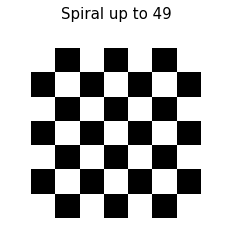

In [115]:
# We colour the grid white if odd and black if even

def generateSpiral(spirals):

    total_cells = (2*(spirals-1)+1)**2
    size = 2*spirals+1


    P = np.zeros((size,size))
    E = np.zeros((size,size)) 


    x = spirals+1
    y = spirals
    P[y,x] = 1
    E[y,x] = 2

    # The first move, hence set to 1
    P[y,x-1] = 1
    # Since 1 is odd we set the grid to 0
    # E for even spiral 
    E[y,x-1] = 0

    #stepping through the square spiral
    for i in range(3, total_cells):
        # Then move up
        if (y + 1 < size) and (P[y + 1, x] == 0) and (P[y, x - 1] == 1):
            y += 1
            # Mark the current position as taken/checked
            P[y, x] = 1
            # update the spiral with even numbers
            E[y,x] = (i % 2 == 0) * i # Check if i is even
        # moving left
        elif (x - 1 >= 0) and (P[y, x - 1] == 0) and (P[y - 1, x] == 1):
            x -= 1
            P[y, x] = 1
            E[y,x] = (i % 2 == 0) * i 
           # moving down
        elif (y - 1 >= 0) and (P[y - 1, x] == 0) and (P[y, x + 1] == 1):
            y -= 1
            P[y, x] = 1
            E[y,x] = (i % 2 == 0) * i 
            #moving right 
        else:
            x += 1
            P[y, x] = 1
            E[y,x] = (i % 2 == 0) * i
    
    return E

lim= 4
P = (generateSpiral(lim) > 0).astype(int)
plt.title('Spiral up to '+ str((2 * (lim - 1) + 1)**2), fontsize=15)
plt.axis('off')

plt.imshow(P,cmap="binary",interpolation="nearest")
plt.show()


### Square numbers 

In [120]:
squares=[]

for i in range (1,50):
    squares.append(i**2) 

print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401]


Our spiral is going the anticlockwise way so we need to flip it

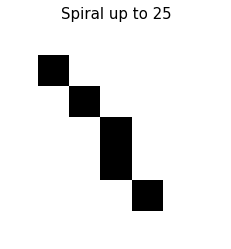

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limit of squares
lim = 3

# Generate squares up to the limit
squares = []
for i in range(1, (2 * lim - 1) + 1):
    squares.append(i ** 2)

# Generate the spiral
def generateSpiral(spirals):
    total_cells = (2*(spirals-1)+1)**2
    size = 2*spirals+1

    # Initialize to a white grid with no positions being filled 
    P = np.zeros((size,size)) # Positions used
    S = np.zeros((size,size)) # Squares spiral

    x = spirals
    y = spirals

    # The first move, hence set to 1
    P[y, x] = 1
    # Since 1 is a square number we set to 1
    S[y, x] = 1

    # Stepping through the square spiral
    for i in range(2, total_cells + 1):
        if (y - 1 >= 0) and (P[y - 1, x] == 0) and (P[y, x + 1] == 1 or x + 1 >= size):
            y -= 1
            P[y, x] = 1
            if i in squares:
                S[y, x] = 1
        elif (x - 1 >= 0) and (P[y, x - 1] == 0) and (P[y - 1, x] == 1 or y - 1 < 0):
            x -= 1
            P[y, x] = 1
            if i in squares:
                S[y, x] = 1
        elif (y + 1 < size) and (P[y + 1, x] == 0) and (P[y, x - 1] == 1 or x - 1 < 0):
            y += 1
            P[y, x] = 1
            if i in squares:
                S[y, x] = 1
        else:
            x += 1
            P[y, x] = 1
            if i in squares:
                S[y, x] = 1
    
    return S

# Generate spiral
P = (generateSpiral(lim) > 0).astype(int)
P_flipped = np.fliplr(P)

# Plot spiral
plt.title('Spiral up to ' + str((2 * (lim - 1) + 1)**2), fontsize=15)
plt.axis('off')
plt.imshow(P_flipped, cmap="binary", interpolation="nearest")
plt.show()


### Multiples of a variable number 'num'

Using same code as above but changing the reference list to multiples of a chosen number

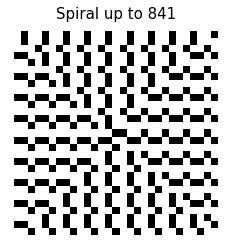

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limit of squares
lim = 15
num = 3

# Generate squares up to the limit
multiples = []
for i in range(1, (2*(lim-1)+1)**2):
    multiples.append(num * i)


# Generate the spiral
def generateSpiral(spirals):
    total_cells = (2*(spirals-1)+1)**2
    size = 2*spirals+1

    P = np.zeros((size,size)) 
    M = np.zeros((size,size)) 

    x = spirals
    y = spirals

    # The first move, hence set to 1
    P[y, x] = 1
    # Since 1 is a square number we set to 1
    M[y, x] = 1

    # Stepping through the square spiral
    for i in range(2, total_cells + 1):
        if (y - 1 >= 0) and (P[y - 1, x] == 0) and (P[y, x + 1] == 1 or x + 1 >= size):
            y -= 1
            P[y, x] = 1
            if i in multiples:
                M[y, x] = 1
        elif (x - 1 >= 0) and (P[y, x - 1] == 0) and (P[y - 1, x] == 1 or y - 1 < 0):
            x -= 1
            P[y, x] = 1
            if i in multiples:
                M[y, x] = 1
        elif (y + 1 < size) and (P[y + 1, x] == 0) and (P[y, x - 1] == 1 or x - 1 < 0):
            y += 1
            P[y, x] = 1
            if i in multiples:
                M[y, x] = 1
        else:
            x += 1
            P[y, x] = 1
            if i in multiples:
                M[y, x] = 1
    
    return M

# Generate spiral
P = (generateSpiral(lim) > 0).astype(int)
P_flipped = np.fliplr(P)

# Plot spiral
plt.title('Spiral up to ' + str((2 * (lim - 1) + 1)**2), fontsize=15)
plt.axis('off')
plt.imshow(P_flipped, cmap="binary", interpolation="nearest")
plt.show()
